# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [226]:
# Import your libraries:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [116]:
websites = pd.read_csv('../website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [117]:
# Your code here
websites = websites.replace('None', np.nan)
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [118]:
websites.shape

(1781, 21)

In [119]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [120]:
websites.describe().T

,count,mean,std,min,25%,50%,75%,max
URL_LENGTH,1781.0,56.961258,27.555586,16.0,39.0,49.0,68.0,249.0
NUMBER_SPECIAL_CHARACTERS,1781.0,11.111735,4.549896,5.0,8.0,10.0,13.0,43.0
CONTENT_LENGTH,969.0,11726.927761,36391.809051,0.0,324.0,1853.0,11323.0,649263.0
TCP_CONVERSATION_EXCHANGE,1781.0,16.261089,40.500975,0.0,0.0,7.0,22.0,1194.0
DIST_REMOTE_TCP_PORT,1781.0,5.472768,21.807327,0.0,0.0,0.0,5.0,708.0
REMOTE_IPS,1781.0,3.060640,3.386975,0.0,0.0,2.0,5.0,17.0
APP_BYTES,1781.0,2982.339135,56050.574748,0.0,0.0,672.0,2328.0,2362906.0
SOURCE_APP_PACKETS,1781.0,18.540146,41.627173,0.0,0.0,8.0,26.0,1198.0
REMOTE_APP_PACKETS,1781.0,18.746210,46.397969,0.0,0.0,9.0,25.0,1284.0
SOURCE_APP_BYTES,1781.0,15892.545761,69861.929888,0.0,0.0,579.0,9806.0,2060012.0


Form websites.describe() it seems like content_lenght, app_bytes, source_app_bytes & remote_app_bytes columns have outliers. I'll take a deep look here in further cells

In [121]:
websites.CONTENT_LENGTH.describe()

count       969.000000
mean      11726.927761
std       36391.809051
min           0.000000
25%         324.000000
50%        1853.000000
75%       11323.000000
max      649263.000000
Name: CONTENT_LENGTH, dtype: float64

After filtering I found 7 rows with SOURCE_APP_BYTES > 300,000, so I can erase those rows because 7 rows against 1781 is not a big deal.

In [122]:
websites_no_outliers = websites[websites['SOURCE_APP_BYTES']<300000.0]
websites_no_outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
URL_LENGTH,1774.0,56.976888,27.599689,16.0,39.0,49.0,68.00,249.0
NUMBER_SPECIAL_CHARACTERS,1774.0,11.112176,4.556512,5.0,8.0,10.0,13.00,43.0
CONTENT_LENGTH,964.0,11213.387967,33796.671481,0.0,324.0,1840.0,11209.00,649263.0
TCP_CONVERSATION_EXCHANGE,1774.0,14.846110,26.204659,0.0,0.0,7.0,22.00,709.0
DIST_REMOTE_TCP_PORT,1774.0,5.148253,19.501833,0.0,0.0,0.0,5.00,708.0
REMOTE_IPS,1774.0,3.054115,3.386447,0.0,0.0,2.0,5.00,17.0
APP_BYTES,1774.0,2878.903608,56106.912891,0.0,0.0,665.0,2315.50,2362906.0
SOURCE_APP_PACKETS,1774.0,17.121195,27.848220,0.0,0.0,8.0,26.00,709.0
REMOTE_APP_PACKETS,1774.0,16.995490,30.260049,0.0,0.0,8.5,24.00,837.0
SOURCE_APP_BYTES,1774.0,12634.236753,31430.139237,0.0,0.0,574.0,9555.00,298694.0


In [123]:
websites_no_outliers.shape

(1774, 21)

In [124]:
websites_no_outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
URL_LENGTH,1774.0,56.976888,27.599689,16.0,39.0,49.0,68.00,249.0
NUMBER_SPECIAL_CHARACTERS,1774.0,11.112176,4.556512,5.0,8.0,10.0,13.00,43.0
CONTENT_LENGTH,964.0,11213.387967,33796.671481,0.0,324.0,1840.0,11209.00,649263.0
TCP_CONVERSATION_EXCHANGE,1774.0,14.846110,26.204659,0.0,0.0,7.0,22.00,709.0
DIST_REMOTE_TCP_PORT,1774.0,5.148253,19.501833,0.0,0.0,0.0,5.00,708.0
REMOTE_IPS,1774.0,3.054115,3.386447,0.0,0.0,2.0,5.00,17.0
APP_BYTES,1774.0,2878.903608,56106.912891,0.0,0.0,665.0,2315.50,2362906.0
SOURCE_APP_PACKETS,1774.0,17.121195,27.848220,0.0,0.0,8.0,26.00,709.0
REMOTE_APP_PACKETS,1774.0,16.995490,30.260049,0.0,0.0,8.5,24.00,837.0
SOURCE_APP_BYTES,1774.0,12634.236753,31430.139237,0.0,0.0,574.0,9555.00,298694.0


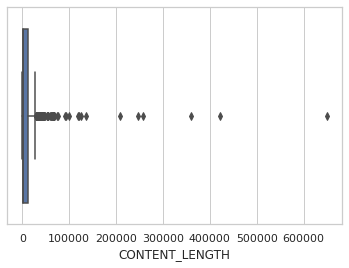

In [125]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x = websites_no_outliers['CONTENT_LENGTH'])

Also, I need to cast the 'WHOIS_UPDATED_DATE' column to datetime type, otherwise it would make a conflict when manipulating dates.

In [126]:
websites_no_outliers['WHOIS_UPDATED_DATE'] = pd.to_datetime(websites_no_outliers['WHOIS_UPDATED_DATE'])


/home/csmbrown/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [127]:
websites_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1774 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1774 non-null   object 
 1   URL_LENGTH                 1774 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1774 non-null   int64  
 3   CHARSET                    1767 non-null   object 
 4   SERVER                     1599 non-null   object 
 5   CONTENT_LENGTH             964 non-null    float64
 6   WHOIS_COUNTRY              1470 non-null   object 
 7   WHOIS_STATEPRO             1414 non-null   object 
 8   WHOIS_REGDATE              1649 non-null   object 
 9   WHOIS_UPDATED_DATE         1637 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1774 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1774 non-null   int64  
 12  REMOTE_IPS                 1774 non-null   int64  
 13  APP_BYTES                  1774 non-null   int64

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

<AxesSubplot:>

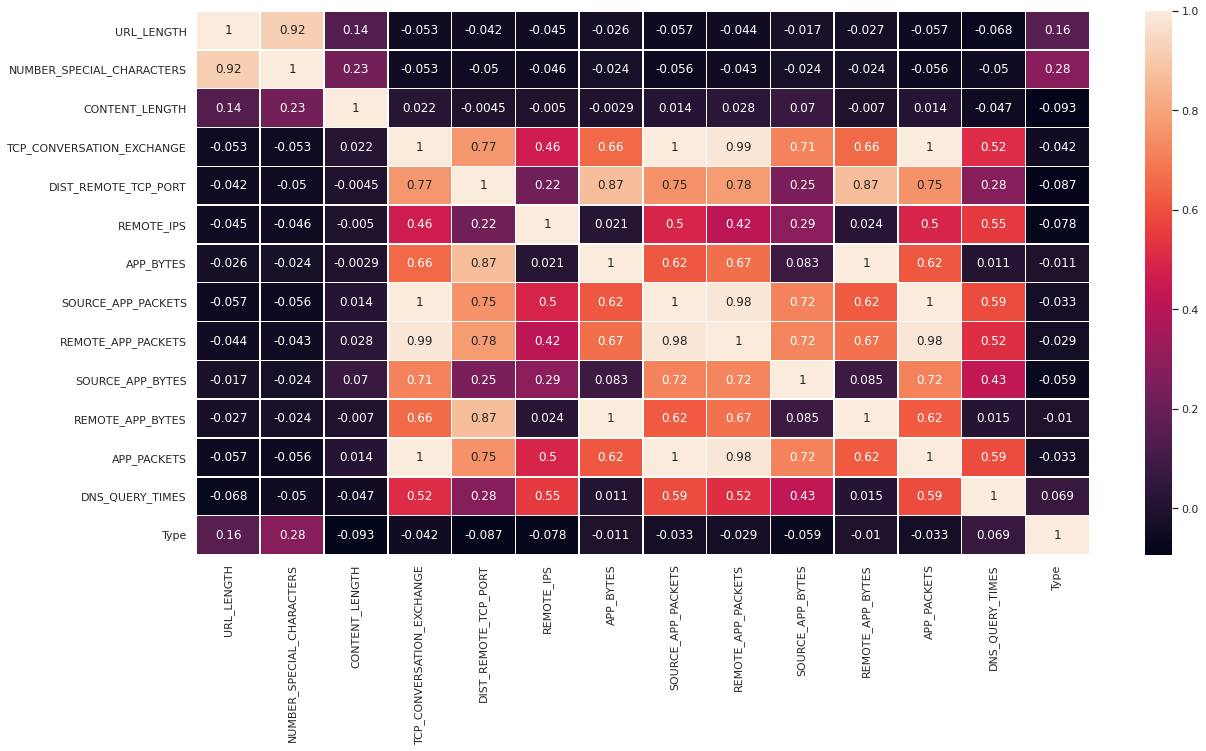

In [128]:
# Your code here
correlations = websites_no_outliers.corr()
f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(correlations,annot=True, linewidths=.5)

In [129]:
#Ok, the following columns are highly correlated:

#TCP_CONVERSATION_EXCHANGE - APP_PACKETS (1)
#TCP_CONVERSATION_EXCHANGE - REMOTE_APP_PACKETS (1)
#TCP_CONVERSATION_EXCHANGE - SOURCE_APP_PACKETS (1)

#APP_BYTES - REMOTE_APP_BYTES (1)
#SOURCE_APP_PACKETS - APP-PACKETS (1)

#REMOTE_APP_PACKETS - APP_PACKETS  (0.98)
#REMOTE_APP-PACKETS - SOURCE_APP_PACKETS (0.98)







# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [130]:
# Your code here
websites_no_outliers = websites_no_outliers.drop(['TCP_CONVERSATION_EXCHANGE','REMOTE_APP_PACKETS', 'SOURCE_APP_PACKETS']\
                                                 , axis = 1)

In [131]:
#From the heat map I reelized that the columns that have more correlations with more columns are SOURCE_APP_PACKETS,
#TCP_CONVERSATION_EXCHANGE & #REMOTE_APP_PACKETS. I eliminated both now let's find if that helped as I tought.
websites_no_outliers.shape

(1774, 18)

<AxesSubplot:>

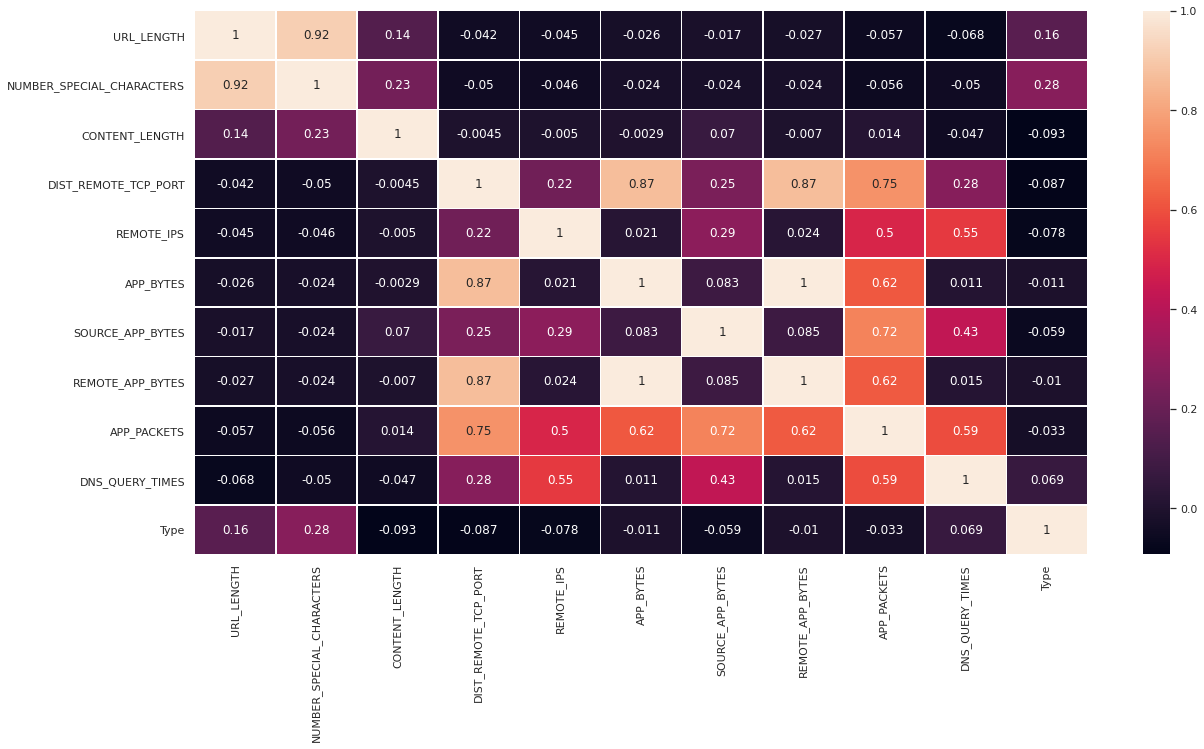

In [132]:
# Print heatmap again
correlations = websites_no_outliers.corr()
f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(correlations,annot=True, linewidths=.5)

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [133]:
# Your code here
websites_no_outliers.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       175
CONTENT_LENGTH               810
WHOIS_COUNTRY                304
WHOIS_STATEPRO               360
WHOIS_REGDATE                125
WHOIS_UPDATED_DATE           137
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [134]:
# Your code here
websites_no_outliers = websites_no_outliers.drop(['CONTENT_LENGTH'], axis= 1)

In [135]:
websites_no_outliers.dropna(inplace = True)
websites_no_outliers.isnull().sum()

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

In [136]:
websites_no_outliers.shape

(1252, 17)

In [137]:
# Your comment here
#Habia más outliers que pude haber cambiado por el promedio pero eran columnas categoricas.

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [138]:
# Examine missing values in each column
websites_no_outliers.isnull().sum()

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [139]:
# Your code here
websites_no_outliers['WHOIS_COUNTRY'].unique()

array(['US', 'SC', 'RU', 'AU', 'CA', 'PA', 'IN', 'GB', "[u'GB'; u'UK']",
       'NL', 'UG', 'JP', 'CN', 'UK', 'SI', 'ru', 'KY', 'AT', 'CZ', 'PH',
       'LV', 'TR', 'ES', 'us', 'HK', 'UA', 'CH', 'BS', 'PK', 'IL', 'DE',
       'SE', 'IT', 'NO', 'BE', 'BY', 'AE', 'IE', 'UY', 'KG'], dtype=object)

In [140]:
websites_no_outliers['WHOIS_COUNTRY'] = websites_no_outliers['WHOIS_COUNTRY'].replace('us', 'US')
websites_no_outliers['WHOIS_COUNTRY'] = websites_no_outliers['WHOIS_COUNTRY'].replace('Cyprus', 'CY')
websites_no_outliers['WHOIS_COUNTRY'] = websites_no_outliers['WHOIS_COUNTRY'].replace('SE', 'se')
websites_no_outliers['WHOIS_COUNTRY'] = websites_no_outliers['WHOIS_COUNTRY'].replace('United Kingdom', 'GB')
websites_no_outliers['WHOIS_COUNTRY'] = websites_no_outliers['WHOIS_COUNTRY'].replace("[u'GB'; u'UK']", 'GB')
websites_no_outliers['WHOIS_COUNTRY'].unique()

array(['US', 'SC', 'RU', 'AU', 'CA', 'PA', 'IN', 'GB', 'NL', 'UG', 'JP',
       'CN', 'UK', 'SI', 'ru', 'KY', 'AT', 'CZ', 'PH', 'LV', 'TR', 'ES',
       'HK', 'UA', 'CH', 'BS', 'PK', 'IL', 'DE', 'se', 'IT', 'NO', 'BE',
       'BY', 'AE', 'IE', 'UY', 'KG'], dtype=object)

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [141]:
# Your code here
websites_no_outliers['WHOIS_COUNTRY'].value_counts().head(10)

US    958
CA     73
ES     63
AU     25
PA     21
GB     18
JP     10
CZ      8
IN      8
CN      8
Name: WHOIS_COUNTRY, dtype: int64

In [142]:
top_10 = ['US','CA', 'ES', 'AU', 'PA', 'GB', 'JP', 'CZ','CN', 'IN']
countries = websites_no_outliers['WHOIS_COUNTRY'].to_list()

for country in range(len(countries)):
    if countries[country] not in top_10:
        countries[country] = 'OTHER'

websites_no_outliers['WHOIS_COUNTRY'] = countries
websites_no_outliers['WHOIS_COUNTRY'].value_counts()

US       958
CA        73
ES        63
OTHER     60
AU        25
PA        21
GB        18
JP        10
CZ         8
CN         8
IN         8
Name: WHOIS_COUNTRY, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [143]:
# Your code here
websites_no_outliers.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], inplace = True, axis = 1)
websites_no_outliers

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
3,B0_113,17,6,ISO-8859-1,nginx,US,22,3,3812,18784,4380,39,8.0,0
5,B0_2064,18,7,UTF-8,nginx,OTHER,6,9,894,838,894,11,0.0,0
6,B0_462,18,6,iso-8859-1,Apache/2,US,0,3,1189,8559,1327,14,2.0,0
7,B0_1128,19,6,us-ascii,Microsoft-HTTPAPI/2.0,US,0,0,0,0,0,0,0.0,0
10,B0_1013,20,6,utf-8,Apache,US,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,UTF-8,Apache,ES,0,0,0,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,ES,0,0,0,124,0,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),US,2,6,6631,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,US,0,0,0,0,0,0,0.0,0


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [144]:
# Your code here
websites_no_outliers.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [145]:
# Your code here
websites_no_outliers.drop(['URL'], inplace = True, axis = 1)
websites_no_outliers

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
3,17,6,ISO-8859-1,nginx,US,22,3,3812,18784,4380,39,8.0,0
5,18,7,UTF-8,nginx,OTHER,6,9,894,838,894,11,0.0,0
6,18,6,iso-8859-1,Apache/2,US,0,3,1189,8559,1327,14,2.0,0
7,19,6,us-ascii,Microsoft-HTTPAPI/2.0,US,0,0,0,0,0,0,0.0,0
10,20,6,utf-8,Apache,US,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,16,UTF-8,Apache,ES,0,0,0,186,0,0,0.0,1
1777,198,17,UTF-8,Apache,ES,0,0,0,124,0,0,0.0,1
1778,201,34,utf-8,Apache/2.2.16 (Debian),US,2,6,6631,132181,6945,87,4.0,0
1779,234,34,ISO-8859-1,cloudflare-nginx,US,0,0,0,0,0,0,0.0,0


#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [146]:
# Your code here
websites_no_outliers['CHARSET'].value_counts()

UTF-8           519
utf-8           276
ISO-8859-1      274
us-ascii         98
iso-8859-1       83
windows-1251      1
windows-1252      1
Name: CHARSET, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [147]:
# Your code here
len(websites_no_outliers['SERVER'].unique())
#Ok, tenemos 193 tipos diferentes de servidor. Eso es algo muy malo.

193

In [148]:
#Se me ocurre eliminar las filas  que pertenezcan a los servidores más raros, I mean, que tienen menos miembros de ese tipo

x = websites_no_outliers['SERVER'].value_counts()
len(x.loc[x.values < 2])

114

![Think Hard](../think-hard.jpg)

In [149]:
# Your comment here
#Yo eliminaría todas las rows que tienen un Server unico, o sea que on el únicode su tipo

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [171]:
# Your code here
servers = websites_no_outliers['SERVER'].to_list()
clean_servers = []

for server_name in servers:
    microsoft = re.search(r'Microsoft', server_name)
    apache = re.search(r'Apache', server_name)
    nginx = re.search(r'nginx', server_name)
    if microsoft:
        clean_servers.append('Microsoft')
    elif apache:
        clean_servers.append('Apache')
    elif nginx:
        clean_servers.append('nginx')
    else:
        clean_servers.append('Other')
        
websites_no_outliers['SERVER'] = clean_servers


In [172]:
# Count `SERVER` value counts here
websites_no_outliers['SERVER'].value_counts()

Apache       487
nginx        321
Other        300
Microsoft    144
Name: SERVER, dtype: int64

In [173]:
websites_no_outliers

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
3,17,6,ISO-8859-1,nginx,US,22,3,3812,18784,4380,39,8.0,0
5,18,7,UTF-8,nginx,OTHER,6,9,894,838,894,11,0.0,0
6,18,6,iso-8859-1,Apache,US,0,3,1189,8559,1327,14,2.0,0
7,19,6,us-ascii,Microsoft,US,0,0,0,0,0,0,0.0,0
10,20,6,utf-8,Apache,US,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,16,UTF-8,Apache,ES,0,0,0,186,0,0,0.0,1
1777,198,17,UTF-8,Apache,ES,0,0,0,124,0,0,0.0,1
1778,201,34,utf-8,Apache,US,2,6,6631,132181,6945,87,4.0,0
1779,234,34,ISO-8859-1,nginx,US,0,0,0,0,0,0,0.0,0


OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [196]:
# Your code here
websites_dummy = pd.get_dummies(websites_no_outliers, drop_first = True)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [199]:
# Your code here
websites_dummy.head(3)


,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,...,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_CZ,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_US
3,17,6,22,3,3812,18784,4380,39,8.0,0,...,0,0,0,0,0,0,0,0,0,1
5,18,7,6,9,894,838,894,11,0.0,0,...,0,0,0,0,0,0,0,1,0,0
6,18,6,0,3,1189,8559,1327,14,2.0,0,...,0,0,0,0,0,0,0,0,0,1


# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [204]:
x = websites_dummy.drop('Type', axis = 1)
y = websites_dummy.Type
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [205]:
# Your code here:
model = LogisticRegression(solver = 'lbfgs', max_iter=500)

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [210]:
# Your code here:
model_fited = model.fit(x_train, y_train)


/home/csmbrown/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

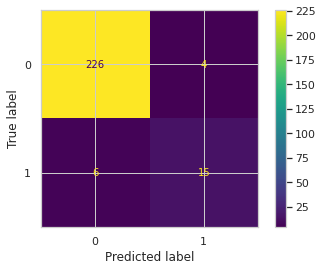

In [224]:
# Your code here:
y_pred = model_fited.predict(x_test)


plot_confusion_matrix(model, x_test, y_test)  
plt.show()  

In [222]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[226   4]
 [  6  15]]
0.9601593625498008


What are your thoughts on the performance of the model? Write your conclusions below.

In [225]:
# Your conclusions here:

#Tenemos un  accuracy por encima del 95% y el plot_matrix_plot se ve muy bien. Creo que es bastantebueno el modelo

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [230]:
# Your code here:
model = KNeighborsClassifier(3, weights = 'distance')
model_fited = model.fit(x_train, y_train)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

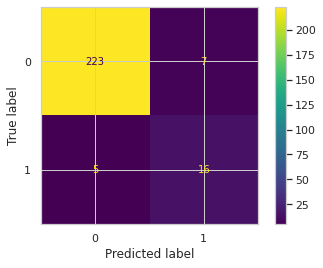

0.952191235059761
[[223   7]
 [  5  16]]


In [231]:
# Your code here:
y_pred = model_fited.predict(x_test)
plot_confusion_matrix(model, x_test, y_test)  
plt.show()
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

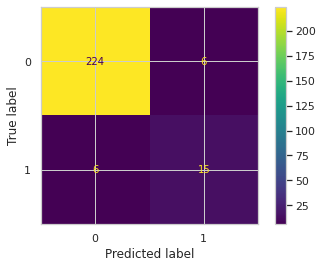

0.952191235059761
[[224   6]
 [  6  15]]


In [233]:
# Your code here:
model = KNeighborsClassifier(5, weights = 'distance')
model_fited = model.fit(x_train, y_train)
y_pred = model_fited.predict(x_test)
plot_confusion_matrix(model, x_test, y_test)  
plt.show()
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [234]:
# Your conclusions here:
#En realidad la diferencia es despreciable, no encuentro una mejora en el performance significativa


# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [163]:
# Your code here